In [87]:
# Import necessary libraries
import pandas as pd
import nltk
import pycountry
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from textstat import textstat

import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kristenfinley/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('eda_data.csv')

# Inspect the data
print(df.head())
print(df.info())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

Top 5 most frequent adjectives:
technical: 951
new: 924
strong: 733
statistical: 500
complex: 473

Top 5 most frequent adjective lemmas:
technical: 951
new: 930
strong: 761
large: 550
high: 503

Adjectives and their frequencies:
relevant: 271
proficient: 41
strong: 733
algorithmic: 19
verbal: 189
quantitative: 264
analytical: 461
able: 327
responsible: 254
complex: 473
analytic: 140
actionable: 144
hoc: 45
clear: 82
constant: 7
competitive: 177
commensurate: 8
excellent: 243
dental: 72
long: 76
short: 12
generous: 65
sick: 30
private: 27
primary: 77
high: 418
stable: 6
strategic: 139
successful: 178
previous: 62
computational: 85
prior: 37
essential: 113
predictive: 265
prescriptive: 26
clinical: 296
disruptive: 5
improved: 27
temporal: 4
robust: 81
open: 130
statistical: 500
mathematical: 72
necessary: 103
effective: 155
secondary: 22
higher: 49
related: 367
advanced: 444
expert: 14
capable: 38
keen: 10
skilled: 63
real: 185
multidisciplinary: 27
new: 924
difficult: 29
creative: 153
n

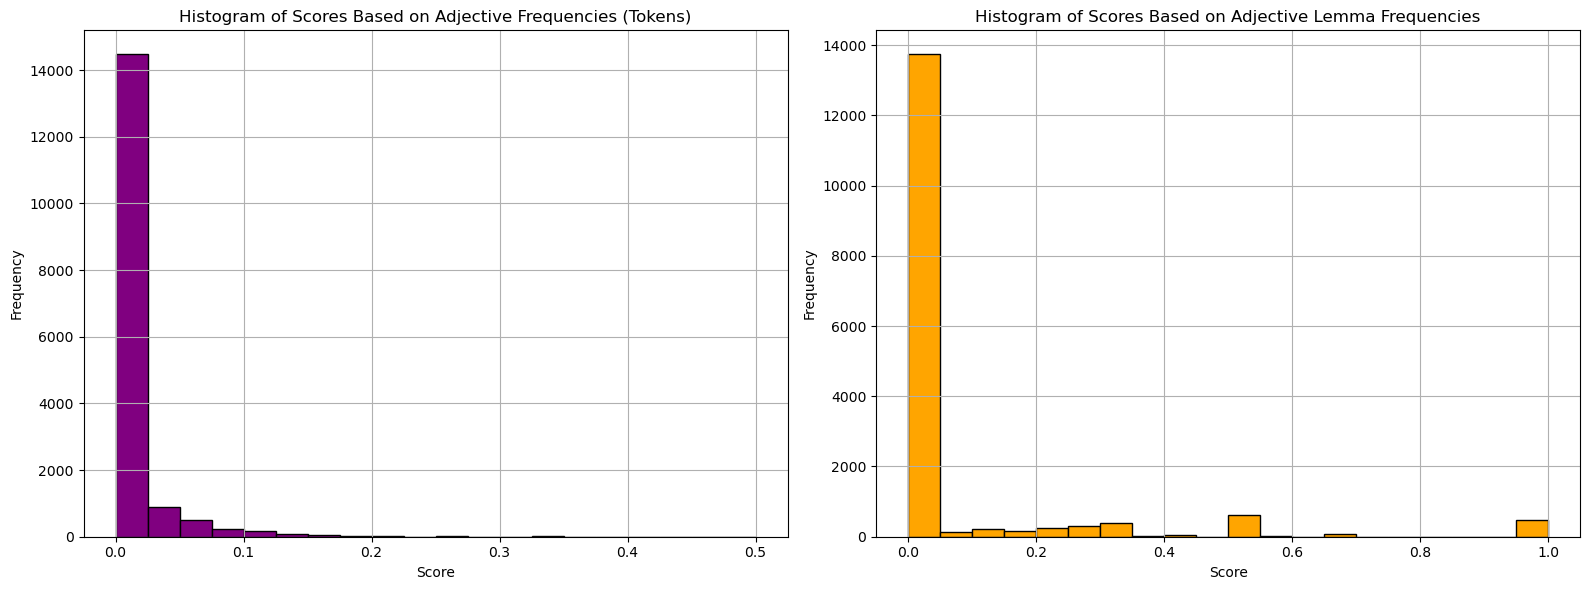

In [90]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Assuming 'df' is your DataFrame and it has a column named 'Job Description'
# Initialize Counters to hold the adjective frequencies and lemma frequencies
token_freq = Counter()
lemma_freq = Counter()

# Process each job description in the DataFrame
for job_desc in df['Job Description']:
    # Process the job description text using spaCy pipeline
    doc = nlp(job_desc)
    
    # Filter out punctuation, stopwords, symbols, numbers, and whitespace, and get adjectives
    filtered_tokens = [token.text.lower() for token in doc if token.pos_ == "ADJ" and not token.is_punct and not token.is_space and not token.is_stop and not token.is_digit and not token.is_currency and not token.is_quote and not token.is_bracket and '/' not in token.text]
    filtered_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ" and not token.is_punct and not token.is_space and not token.is_stop]
    
    # Update the adjective frequency counter and the adjective lemma frequency counter
    token_freq.update(filtered_tokens)
    lemma_freq.update(filtered_lemmas)

# Get the 5 most frequent adjectives and lemmas
top_5_adjectives = token_freq.most_common(5)
top_5_adjective_lemmas = lemma_freq.most_common(5)

# Print the most frequent adjectives and lemmas with appropriate labels
print("Top 5 most frequent adjectives:")
for adj, frequency in top_5_adjectives:
    print(f"{adj}: {frequency}")

print("\nTop 5 most frequent adjective lemmas:")
for adj, frequency in top_5_adjective_lemmas:
    print(f"{adj}: {frequency}")

# Print all adjectives and their frequencies with appropriate labels
print("\nAdjectives and their frequencies:")
for adj, frequency in token_freq.items():
    print(f"{adj}: {frequency}")

# Print all adjective lemmas and their frequencies with appropriate labels
print("\nAdjective lemmas and their frequencies:")
for adj, frequency in lemma_freq.items():
    print(f"{adj}: {frequency}")

# Define method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    words = sentence.split()
    # Count interesting tokens
    interesting_count = sum(1 for word in words if word.lower() in interesting_tokens)
    # Return score
    return interesting_count / len(words) if words else 0

# Define method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy pipeline
    doc = nlp(sentence)
    # Get lemmas of adjectives
    lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ" and not token.is_punct and not token.is_space and not token.is_stop]
    # Count interesting lemmas
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return score
    return interesting_count / len(lemmas) if lemmas else 0

# Define lists to store scores
token_scores_list = []
lemma_scores_list = []

# Process each job description to get sentences and calculate scores
for job_desc in df['Job Description']:
    # Process the job description text using spaCy pipeline
    doc = nlp(job_desc)
    
    # Iterate through each sentence in the job description
    for sentence in doc.sents:
        # Calculate the score for the sentence using adjective frequencies
        token_score = score_sentence_by_token(sentence.text, [token.lower() for token, _ in top_5_adjectives])
        lemma_score = score_sentence_by_lemma(sentence.text, [lemma.lower() for lemma, _ in top_5_adjective_lemmas])
        # Append the scores to the lists
        token_scores_list.append(token_score)
        lemma_scores_list.append(lemma_score)

# Plot histograms of the scores
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(token_scores_list, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Scores Based on Adjective Frequencies (Tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(lemma_scores_list, bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Scores Based on Adjective Lemma Frequencies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Calculate communal and agentic scores
df['communal_score'] = df['cleaned_description'].apply(lambda x: count_words(x, communal_words))
df['agentic_score'] = df['cleaned_description'].apply(lambda x: count_words(x, agentic_words))

# Calculate frequency of communal and agentic words
df['communal_freq'] = df['communal_score'] / df['cleaned_description'].apply(len)
df['agentic_freq'] = df['agentic_score'] / df['cleaned_description'].apply(len)

# Visualization
plt.figure(figsize=(12, 6))
df['communal_score'].plot(kind='hist', alpha=0.5, label='Communal Score', color='blue')
df['agentic_score'].plot(kind='hist', alpha=0.5, label='Agentic Score', color='red')
plt.legend()
plt.xlabel('Score')
plt.title('Distribution of Communal and Agentic Scores in Job Descriptions')
plt.show()

plt.figure(figsize=(12, 6))
df['communal_freq'].plot(kind='hist', alpha=0.5, label='Communal Frequency', color='blue')
df['agentic_freq'].plot(kind='hist', alpha=0.5, label='Agentic Frequency', color='red')
plt.legend()
plt.xlabel('Frequency')
plt.title('Distribution of Communal and Agentic Frequencies in Job Descriptions')
plt.show()

print(df.info())